# An example of including a new forward problem in CoFI

CoFI will ship with a bunch of pre-defined forward problems and inverse solvers, and examples showing how to connect the two.

But we would like users of CoFI to be able to come along with their own forward problem, and by doing as little as work as possible (ideally, just writing a yml file), be able to use CoFI. This notebook steps through that process, starting from the point of view of a user that has ONLY downloaded CoFI, and wants to use it to help solve/sample their forward problem.

This notebook will focus on user that brings a forward program in a compiled language (here, python)


## Compiling thei

gfortran -c code/RFsubs/*.f code/RFsubs/*.f90 code/RF.f90
f2py -m rfc -c rfcofi.f90 code/*.o code/RFsubs/*.o


In [1]:
import numpy as np
import pandas as pd

In [2]:
import rfc

In [3]:
dir(rfc)

['__doc__',
 '__f2py_numpy_version__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_rfc_error',
 'cofi_init',
 'cofi_misfit',
 'globvars']

In [4]:
print(rfc.cofi_init.__doc__)


cofi_init()

Wrapper for ``cofi_init``.




In [5]:
rfc.cofi_init()

In [10]:
ref_model = np.asarray([
    [8.370596, 3.249075, 1.7],
    [17.23163, 3.001270, 1.7],
    [1.9126695E-02, 2.509443, 1.7],
    [19.78145, 3.562691, 1.7],
    [41.73066, 4.225965, 1.7],
    [14.35261, 2.963322, 1.7],
    [49.92358, 4.586726, 1.7]
]) 
noisy_model = ref_model.copy()
noisy_model[:,0:2]  += np.random.random((7, 2))*0.5

In [11]:
predicted, actual, misfit = rfc.cofi_misfit(noisy_model)

In [12]:
from matplotlib import pyplot as plt
from plotnine import *

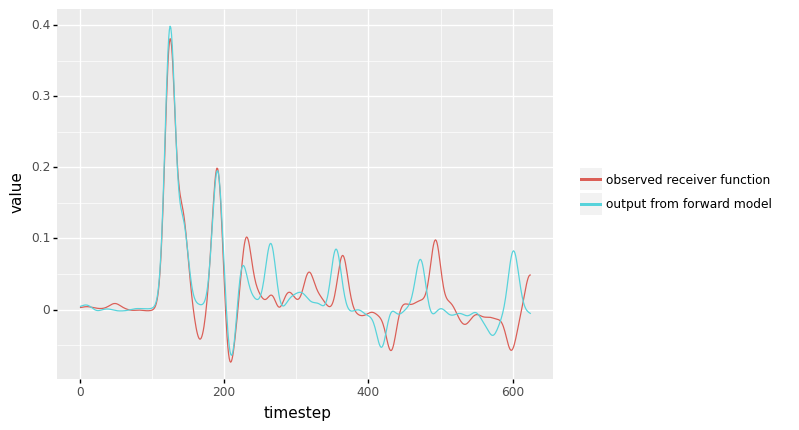

<ggplot: (8748402769448)>

In [13]:
df = pd.DataFrame({"timestep" : list(range(len(predicted))), "output from forward model" : predicted, "observed receiver function": actual})
ggplot(df.melt(id_vars=["timestep"]), aes(x="timestep", y="value",colour="variable")) + geom_line() + theme(legend_title=element_blank())

# The solver

This is what the user would specify in a yml file, but they can also just initialize it in python, like this:


In [ ]:
from cofi.